from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Google Drive where you have saved the unzipped
FOLDERNAME =  'ADX/'

assert FOLDERNAME is not None, 'ERROR'

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../

# 한글 나눔포트 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 모델 수립을 위한 Train/Validation Set
df = pd.read_csv('./ADX/Data_UsedCarPrediction/Kia_dataset.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

# 시스템 구현을 위한 Test Set 샘플
df_test = pd.read_csv('./ADX/Data_UsedCarPrediction/Kia_testset_sample.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

%matplotlib inline
pd.options.display.max_rows = 1000
import seaborn as sns
import missingno as msno 

#print(df.info(verbose=True))

categorical_var_list = [
    'GOODNO', 'CARNM', 'CHASNO', 'YEAR','YEARCHK', 'INNEEXPOCLASCD_YN', 'MISSNM', 'FUELNM', 'COLOR',
    'OWNECLASNM', 'USEUSENM', 'MF_KEY', 'MJ_MODEL_KEY', 'DT_MODEL_KEY', 'MJ_GRADE_KEY',
    'DT_GRADE_KEY', 'NC_GRADE_KEY'
]
numeric_var_list = [
    'SHIPPING_PRICE', 'SUCCPRIC', 'TRAVDIST', 'EXHA','NEWCARPRIC','NC_GRADE_PRICE',
    'BONET', 'FRONT_LEFT_FENDER', 'FRONT_RIGHT_FENDER',
    'FRONT_LEFT_DOOR', 'FRONT_RIGHT_DOOR', 'BACK_LEFT_DOOR', 'BACK_RIGHT_DOOR', 'TRUNK',
    'FRONT_PANNEL', 'LEFT_STEP', 'RIGHT_STEP', 'LEFT_FILER_A', 'RIGHT_FILER_A',
    'LEFT_FILER_B', 'RIGHT_FILER_B', 'LEFT_FILER_C', 'RIGHT_FILER_C', 'LEFT_REAR_FENDER',
    'RIGHT_REAR_FENDER', 'BACK_PANEL1', 'LEFT_INSIDE_PANEL', 'RIGHT_INSIDE_PANEL',
    'LEFT_WHEEL_HOUSE', 'RIGHT_WHEEL_HOUSE', 'LEFT_INSIDE_WHEEL_HOUSE',
    'RIGHT_INSIDE_WHEEL_HOUSE', 'LEFT_REAR_WHEEL_HOUSE', 'RIGHT_REAR_WHEEL_HOUSE',
    'TRUNK_FLOOR', 'DASH_PANEL', 'SHEET_PANEL', 'SIDE_MEMBER_FRAME', 'LEFT_QUARTER',
    'RIGHT_QUARTER', 'FLOOR_PANEL', 'LEFT_SIDE_PANEL', 'RIGHT_SIDE_PANEL',
    'LEFT_REAR_CORNER_PANEL', 'RIGHT_REAR_CORNER_PANEL', 'BACK_PANEL2',
    'LEFT_CORNER_PANEL', 'RIGHT_CORNER_PANEL', 'LEFT_SKIRT_PANEL', 'RIGHT_SKIRT_PANEL',
    'SIDE_MEMBER_FRAME2', 'LEFT_INSIDE_SHEETING', 'RIGHT_INSIDE_SHEETING',
    'LEFT_WHEEL_HOUSE_SHEETING', 'RIGHT_WHEEL_HOUSE_SHEETING',
    'LEFT_REAR_INSIDE_PANEL_SHEETING', 'RIGHT_REAR_INSIDE_PANEL_SHEETING',
    'LEFT_REAR_WHEEL_HOUSE_SHEETING', 'RIGHT_REAR_WHEEL_HOUSE_SHEETING',
    'TRUNK_FLOOR_SHEETING', 'DASH_PANEL_SHEETING', 'SHEET_BACK_PANEL_SHEETING',
    'SIDE_MEMBER_FRAME_SHEETING', 'FLOOR_PANEL_SHEETING', 'LEFT_SIDE_PANEL_SHEETING',
    'RIGHT_SIDE_PANEL_SHEETING', 'FLOODING', 'TOTAL_LOSS', 'JOINCAR', 'NOTAVAILABLE',
    'ABS', 'AB2', 'NAVIGATION', 'VDC', 'SMARTKEY', 'SUNLOOPPANORAMA', 'SUNLOOPCOMMON',
    'SUNLOOPDUAL', 'DIS', 'TCS', 'AB1', 'ETC', 'AV', 'EPS', 'ECS'
]

missing_list =[
    'SHIPPING_PRICE', 'SUCCPRIC', 'TRAVDIST', 'EXHA','NC_GRADE_PRICE', 'NEWCARPRIC', 'MF_KEY', 'MJ_MODEL_KEY', 'DT_MODEL_KEY', 'MJ_GRADE_KEY','DT_GRADE_KEY','NC_GRADE_KEY','SHIPPING_PRICE'
]

In [375]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000
import seaborn as sns
import missingno as msno 

# data read
df = pd.read_csv('Kia_dataset.csv', encoding='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'
print(df.head())
print("@데이터 차원 확인\n","(데이터 수, 변수) =",df.shape,"\n\n")
print(df.info(verbose=True))

categorical_var_list = [
    'GOODNO', 'CARNM', 'CHASNO', 'YEAR','YEARCHK', 'INNEEXPOCLASCD_YN', 'MISSNM', 'FUELNM', 'COLOR',
    'OWNECLASNM', 'USEUSENM', 'MF_KEY', 'MJ_MODEL_KEY', 'DT_MODEL_KEY', 'MJ_GRADE_KEY',
    'DT_GRADE_KEY', 'NC_GRADE_KEY'
]
numeric_var_list = [
    'SHIPPING_PRICE', 'SUCCPRIC', 'TRAVDIST', 'EXHA','NEWCARPRIC','NC_GRADE_PRICE',
    'BONET', 'FRONT_LEFT_FENDER', 'FRONT_RIGHT_FENDER',
    'FRONT_LEFT_DOOR', 'FRONT_RIGHT_DOOR', 'BACK_LEFT_DOOR', 'BACK_RIGHT_DOOR', 'TRUNK',
    'FRONT_PANNEL', 'LEFT_STEP', 'RIGHT_STEP', 'LEFT_FILER_A', 'RIGHT_FILER_A',
    'LEFT_FILER_B', 'RIGHT_FILER_B', 'LEFT_FILER_C', 'RIGHT_FILER_C', 'LEFT_REAR_FENDER',
    'RIGHT_REAR_FENDER', 'BACK_PANEL1', 'LEFT_INSIDE_PANEL', 'RIGHT_INSIDE_PANEL',
    'LEFT_WHEEL_HOUSE', 'RIGHT_WHEEL_HOUSE', 'LEFT_INSIDE_WHEEL_HOUSE',
    'RIGHT_INSIDE_WHEEL_HOUSE', 'LEFT_REAR_WHEEL_HOUSE', 'RIGHT_REAR_WHEEL_HOUSE',
    'TRUNK_FLOOR', 'DASH_PANEL', 'SHEET_PANEL', 'SIDE_MEMBER_FRAME', 'LEFT_QUARTER',
    'RIGHT_QUARTER', 'FLOOR_PANEL', 'LEFT_SIDE_PANEL', 'RIGHT_SIDE_PANEL',
    'LEFT_REAR_CORNER_PANEL', 'RIGHT_REAR_CORNER_PANEL', 'BACK_PANEL2',
    'LEFT_CORNER_PANEL', 'RIGHT_CORNER_PANEL', 'LEFT_SKIRT_PANEL', 'RIGHT_SKIRT_PANEL',
    'SIDE_MEMBER_FRAME2', 'LEFT_INSIDE_SHEETING', 'RIGHT_INSIDE_SHEETING',
    'LEFT_WHEEL_HOUSE_SHEETING', 'RIGHT_WHEEL_HOUSE_SHEETING',
    'LEFT_REAR_INSIDE_PANEL_SHEETING', 'RIGHT_REAR_INSIDE_PANEL_SHEETING',
    'LEFT_REAR_WHEEL_HOUSE_SHEETING', 'RIGHT_REAR_WHEEL_HOUSE_SHEETING',
    'TRUNK_FLOOR_SHEETING', 'DASH_PANEL_SHEETING', 'SHEET_BACK_PANEL_SHEETING',
    'SIDE_MEMBER_FRAME_SHEETING', 'FLOOR_PANEL_SHEETING', 'LEFT_SIDE_PANEL_SHEETING',
    'RIGHT_SIDE_PANEL_SHEETING', 'FLOODING', 'TOTAL_LOSS', 'JOINCAR', 'NOTAVAILABLE',
    'ABS', 'AB2', 'NAVIGATION', 'VDC', 'SMARTKEY', 'SUNLOOPPANORAMA', 'SUNLOOPCOMMON',
    'SUNLOOPDUAL', 'DIS', 'TCS', 'AB1', 'ETC', 'AV', 'EPS', 'ECS'
]

missing_list =[
    'SHIPPING_PRICE', 'SUCCPRIC', 'TRAVDIST', 'EXHA','NC_GRADE_PRICE', 'NEWCARPRIC', 'MF_KEY', 'MJ_MODEL_KEY', 'DT_MODEL_KEY', 'MJ_GRADE_KEY','DT_GRADE_KEY','NC_GRADE_KEY','SHIPPING_PRICE'
]

      GOODNO   SUCCYMD                     CARNM             CHASNO  \
0  1512A2469  20160105     모닝 LPi LX 기본 블랙 프리미엄   KNABK518BBT020038   
1  1512A2364  20160105  K3 1.6 가솔린(4도어) Nobless   KNAFZ412BDA040155   
2  1512A2319  20160105   K3 1.6 가솔린(4도어) Trendy   KNAFK412BEA206484   
3  1512A1643  20160105        K5 2.0LPI 렌터카 디럭스   KNAGN418BDA366086   
4  1512A1371  20160105        K5 2.0LPI 렌터카 스마트   KNAGN415BBA140279   

   CARREGIYMD  YEAR MISSNM FUELNM COLOR  EXHA  ...  SUNLOOPPANORAMA  \
0  20100616.0  2011    A/T    LPG     C  1000  ...                0   
1  20130207.0  2013    A/T    가솔린     A  1600  ...                0   
2  20140128.0  2014    A/T    가솔린     A  1591  ...                0   
3  20121218.0  2013    A/T    LPG     B  2000  ...                0   
4  20110428.0  2011    A/T    LPG     D  2000  ...                0   

  SUNLOOPCOMMON SUNLOOPDUAL DIS  TCS  AB1 ETC  AV  EPS  ECS  
0             0           0   0    0    1   0   0    0    0  
1             0       

In [376]:
#############################################################
# 데이터 전처리 순서
# 1. 결측치가 많거나 결측치로 판단되는 것들 제거
# 2. 이상치 처리
# 3. 차원 축소 및 새로운 파생변수 생성 
#############################################################

In [377]:
#1. Null Value 처리

#1-1 각 컬럼별로 null 값의 비율을 확인
def NullFunc(df_):
    #0값 결측값으로 변환
    for i in missing_list:
        df[i] = df[i].replace(0, np.nan)
        df[i] = df[i].replace('0', np.nan)

    for i in df.columns:
        X_i = df.loc[:, i]
        notNullRatio = X_i.dropna().shape[0] / df.shape[0]
        if (notNullRatio != 1):
            print("column {} have {} null value".format(i, df.shape[0]-X_i.dropna().shape[0]),
                  '\n')
            #del_col_list.append(i) 결측값 많을 시 추가
    print(msno.matrix(df))
    print(df.isnull().sum())
    return df_

In [378]:
#2. 변수 유형 파악 및 올바른 데이터 타입 설정
import datetime
import math
def ChangeType(df_):
   #2-1 categoric, numeric
   for i in categorical_var_list:
       df_[i]=df_[i].astype('object', errors='ignore')
   for i in numeric_var_list:
       df_[i]=df_[i].astype('int64', errors='ignore')

   #2-2 datetime
   df_['SUCCYMD'] = pd.to_datetime(df['SUCCYMD'], format='%Y%m%d') 
   df_['CARREGIYMD'] = pd.to_datetime(df['CARREGIYMD'], format='%Y%m%d') 

   #2-3 값 대체
   #YEARCHK (Y, N) -> (1, 0)
   for i in np.where(df_['YEARCHK']=='Y'):
    df_['YEARCHK'][i]=1
   for i in np.where(df_['YEARCHK']=='N'):
    df_['YEARCHK'][i]=0

   #INNEEXPOCLASCD_YN (O, X) -> (1, 0)
   for i in np.where(df_['INNEEXPOCLASCD_YN']=='O'):
    df_['INNEEXPOCLASCD_YN'][i]=1
   for i in np.where(df_['INNEEXPOCLASCD_YN']=='X'):
    df_['INNEEXPOCLASCD_YN'][i]=0

    print(df_.dtypes)
    return df_

In [379]:
#사고 때문에 발생한 교환 및 판금 변수 들의 차원 축소
#전손, 침수 등의 심각한 영향을 끼치는 요인 통합
def cal_accidents(df):
    accident1 = []
    accident2 = []
    accident3 = []
    accident4 = []
    ### 무사고 or 유사고
    accident1 = np.array(df.loc[:,'BONET']+df.loc[:,'FRONT_LEFT_FENDER']
                     +df.loc[:,'FRONT_RIGHT_FENDER']+df.loc[:,'FRONT_LEFT_DOOR']
                     +df.loc[:,'FRONT_RIGHT_DOOR']+df.loc[:,'BACK_LEFT_DOOR']
                     +df.loc[:,'BACK_RIGHT_DOOR']+df.loc[:,'TRUNK'])
    ### 심각한 유사고
    accident2 = np.array(df.loc[:,'FRONT_PANNEL']+df.loc[:,'LEFT_STEP']
                     +df.loc[:,'RIGHT_STEP']+df.loc[:,'LEFT_FILER_A']
                     +df.loc[:,'RIGHT_FILER_A']+df.loc[:,'LEFT_FILER_B']
                     +df.loc[:,'RIGHT_FILER_B']+df.loc[:,'LEFT_FILER_C']
                     +df.loc[:,'RIGHT_FILER_C']+df.loc[:,'LEFT_REAR_FENDER']
                     +df.loc[:,'RIGHT_REAR_FENDER']+df.loc[:,'BACK_PANEL1']
                     +df.loc[:,'LEFT_QUARTER']+df.loc[:,'LEFT_FILER_C']
                     +df.loc[:,'LEFT_REAR_CORNER_PANEL']+df.loc[:,'RIGHT_REAR_CORNER_PANEL']
                     +df.loc[:,'BACK_PANEL2']+df.loc[:,'LEFT_CORNER_PANEL']
                     +df.loc[:,'RIGHT_CORNER_PANEL']+df.loc[:,'LEFT_SKIRT_PANEL']
                     +df.loc[:,'RIGHT_SKIRT_PANEL']+df.loc[:,'SIDE_MEMBER_FRAME2'])
    ### 판금도 가능했던 심각한 유사고
    accident3 = np.array(df.loc[:,'LEFT_INSIDE_PANEL']+df.loc[:,'RIGHT_INSIDE_PANEL']
                     +df.loc[:,'LEFT_WHEEL_HOUSE']+df.loc[:,'RIGHT_WHEEL_HOUSE']
                     +df.loc[:,'LEFT_INSIDE_WHEEL_HOUSE']+df.loc[:,'RIGHT_INSIDE_WHEEL_HOUSE']
                     +df.loc[:,'LEFT_REAR_WHEEL_HOUSE']+df.loc[:,'RIGHT_REAR_WHEEL_HOUSE']
                     +df.loc[:,'TRUNK_FLOOR']+df.loc[:,'DASH_PANEL']
                     +df.loc[:,'SHEET_PANEL']+df.loc[:,'SIDE_MEMBER_FRAME']
                     +df.loc[:,'FLOOR_PANEL']+df.loc[:,'LEFT_SIDE_PANEL']
                     +df.loc[:,'RIGHT_SIDE_PANEL'])
    ###사고는 컸지만 수리가 가벼움
    accident4 =  np.array(df.loc[:,'LEFT_INSIDE_SHEETING']+df.loc[:,'RIGHT_INSIDE_SHEETING']
                     +df.loc[:,'LEFT_WHEEL_HOUSE_SHEETING']+df.loc[:,'RIGHT_WHEEL_HOUSE_SHEETING']
                     +df.loc[:,'LEFT_REAR_INSIDE_PANEL_SHEETING']+df.loc[:,'RIGHT_REAR_INSIDE_PANEL_SHEETING']
                     +df.loc[:,'LEFT_REAR_WHEEL_HOUSE_SHEETING']+df.loc[:,'RIGHT_REAR_WHEEL_HOUSE_SHEETING']
                     +df.loc[:,'TRUNK_FLOOR_SHEETING']+df.loc[:,'DASH_PANEL_SHEETING']
                     +df.loc[:,'SHEET_BACK_PANEL_SHEETING']+df.loc[:,'SIDE_MEMBER_FRAME_SHEETING']
                     +df.loc[:,'FLOOR_PANEL_SHEETING']+df.loc[:,'LEFT_SIDE_PANEL_SHEETING']
                     +df.loc[:,'RIGHT_SIDE_PANEL_SHEETING'])
    
    df['ACCI1'] = accident1
    df['ACCI2'] = accident2
    df['ACCI3'] = accident3
    df['ACCI4'] = accident4
    
    #참수, 전소느 접합, 운행불가는 하나만 존재해도 가격에 심각한 악영향을 끼치는 것으로 판단하여 통합
    trash = []
    for a,b,c,d in np.array(df[['FLOODING', 'TOTAL_LOSS','JOINCAR','NOTAVAILABLE']]):
        if (a + b + c + d) > 0:
            trash.append(1)
        else:
            trash.append(0)
     
    df['TRASHCAR'] = trash
    
    return df

In [380]:
#옵션을 3가지로 분류하여 옵션 수의 총 합으로 차원을 축소
#총 3가지의 옵션으로 나눔. 편리, 안전, 운전
def cal_options(df):
    sun_loop = []
    safety_op = []
    driving_op = []
    comfort_op = []
    
    for a,b,c in np.array(df[['SUNLOOPPANORAMA', 'SUNLOOPCOMMON','SUNLOOPDUAL']]):
        if (a==1) or (b==1) or (c==1):
            sun_loop.append(1)
        else:
            sun_loop.append(0)
    
    df['SUNLOOP'] = sun_loop
    #편리 기능 옵션 합계
    comfort_opp = np.array(df.loc[:,'NAVIGATION']+df.loc[:,'SMARTKEY']
                     +df.loc[:,'SUNLOOP']+df.loc[:,'ETC']+df.loc[:,'AV'])
    #안전 기능 옵션 합계
    safety_opp = np.array(df.loc[:,'ABS']+df.loc[:,'AB2']+df.loc[:,'VDC']
                     +df.loc[:,'DIS']+df.loc[:,'TCS']+df.loc[:,'AB1'])
    #운전 기능 옵션 합계
    driving_opp = np.array(df.loc[:,'EPS']+df.loc[:,'ECS'])
    
    df['SAFETYOP'] = safety_opp
    df['DRIVEOP'] = driving_opp
    df['COMFORTOP'] = comfort_opp
    
    return df

In [381]:
# 데이터 시각화
def plotHistogram(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    
    for _n, i in enumerate(columns):
        df.describe()
        fig=plt.figure(figsize=(20,8))
        fig.patch.set_facecolor('xkcd:white')

        plt.subplot(2,3,_n + 1)
        plt.title(i)
        df.loc[:,i].hist(bins=50)
    plt.show()

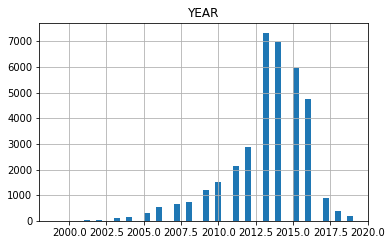

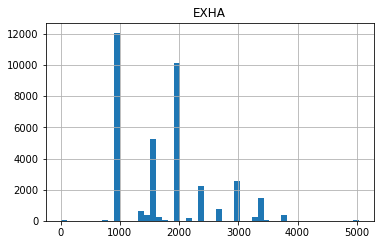

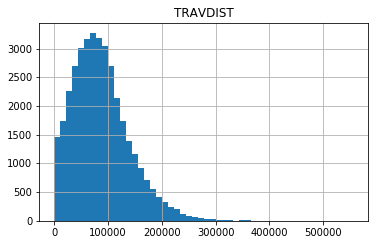

In [382]:
plotHistogram(df, ['YEAR','EXHA', 'TRAVDIST']) 

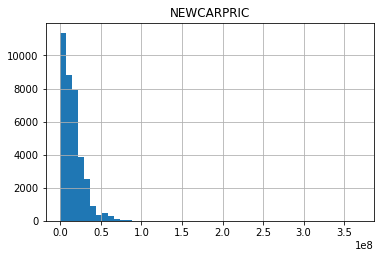

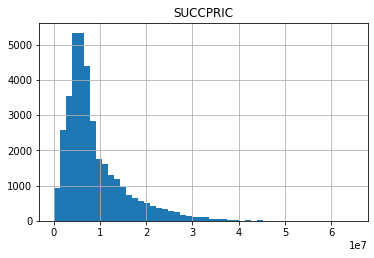

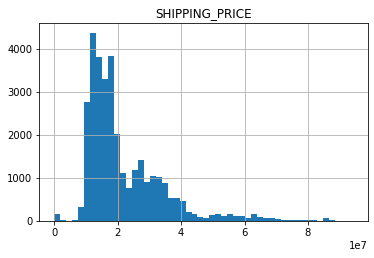

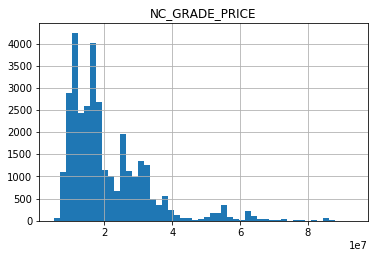

In [383]:
plotHistogram(df, ['NEWCARPRIC','SUCCPRIC','SHIPPING_PRICE','NC_GRADE_PRICE'])

In [384]:
def nan_carprice(x):
    if x<100000:
        return np.nan


In [385]:
#3. Outlier 처리
# numeric var : 'EXHA', 'TRAVDIST', 'NC_GRADE_PRICE', 'SHIPPING_PRICE', 'NEWCARPRIC', 'SUCCPRIC'
def remove_outliers(df_):
    originDataNum = df_.shape[0]
    df['NEWCARPRIC'] = df['NEWCARPRIC'].map(nan_carprice)
    df_['NEWCARPRIC'].replace(1,np.nan, inplace=True)
    #배기량은 하위 1%, 상위 1% outlier 처리
    lb_1, ub_1 = np.nanpercentile(df_['EXHA'],[1,99])
    #주행거리는 상위 1% outlier 처리
    lb_2, ub_2 = np.nanpercentile(df_['TRAVDIST'],[1,99])
    #신차등급가격, 출고가, 신차금액은 상위 1% 및 500만원 이하 outlier 처리
    #lb_3 = np.where(df_['NC_GRADE_PRICE']<5000000) 해당 값이 없어서 제거
    ub_3 = np.nanpercentile(df_['NC_GRADE_PRICE'],99)
    lb_4 = np.where(df_['SHIPPING_PRICE']<5000000)
    ub_4 = np.nanpercentile(df_['SHIPPING_PRICE'],99)
    lb_5 = np.where(df_['NEWCARPRIC']<5000000)
    ub_5 = np.nanpercentile(df_['NEWCARPRIC'],99)
    #낙찰가는 상위 1% outlier 처리
    ub_6 = np.nanpercentile(df_['SUCCPRIC'],99)

    outliers = np.where((df_['EXHA']<lb_1)|(df_['EXHA']>ub_1)
                       |(df_['TRAVDIST']<lb_2)|(df_['TRAVDIST']>ub_2)
                       |(df_['NC_GRADE_PRICE']>ub_3)
                       |(df_['SHIPPING_PRICE']<5000000)|(df_['SHIPPING_PRICE']>ub_4)
                       |(df_['NEWCARPRIC']<5000000)|(df_['NEWCARPRIC']>ub_5)
                       |(df_['SUCCPRIC']>ub_6)
                       )
    df_ = df_.drop(df_.index[outliers[0]])
    
    print("제거된 행 수" , originDataNum-df_.shape[0])    
    return df_, lb_1, ub_1, lb_2, ub_2, ub_3 ,lb_4, ub_4, lb_5, ub_5, ub_6

def remove_outliers_test(df_, lb_1, ub_1, lb_2, ub_2, ub_3 ,lb_4, ub_4, lb_5, ub_5, ub_6):
    outliers = np.where((df_['EXHA']<lb_1)|(df_['EXHA']>ub_1)
                      |(df_['TRAVDIST']<lb_2)|(df_['TRAVDIST']>ub_2)
                      |(df_['NC_GRADE_PRICE']>ub_3)
                      |(df_['SHIPPING_PRICE']<5000000)|(df_['SHIPPING_PRICE']>ub_4)
                      |(df_['NEWCARPRIC']<5000000)|(df_['NEWCARPRIC']>ub_5)
                      |(df_['SUCCPRIC']>ub_6)
                      )
    df_ = df_.drop(df_.index[outliers[0]])
    return df_

In [386]:
#차량명에서 맨 앞만 따와서 차량명의 새로운 파생변수 생성
#소나타 2017년 하이브리드 -> 소나타
def car_name_split(df):
    func_split = lambda x : x.split()[0]
    df['New_CARNM'] = df['CARNM'].map(func_split)
    df['Car_NMFUEL'] = df['New_CARNM']+ ' '+df['FUELNM']
    return df

In [387]:
# 차량명+연료에 따른 자동차들의 평균값 파생변수 생성
def set_price_mean(df_): 
    df_ship_price_mean = pd.DataFrame(df_['SHIPPING_PRICE'].groupby(df_['Car_NMFUEL']).mean())
    df_nc_price_mean = pd.DataFrame(df_['NC_GRADE_PRICE'].groupby(df_['Car_NMFUEL']).mean())
    df_new_price_mean = pd.DataFrame(df_['NEWCARPRIC'].groupby(df_['Car_NMFUEL']).mean())

    df_list = [df_ship_price_mean,df_nc_price_mean,df_new_price_mean]
    col_list = ['ship_mean','nc_mean','new_mean']

    for dfl,col in zip(df_list,col_list):
        df_ = df_.merge(dfl, how='left', left_on='{}'.format('Car_NMFUEL'), right_on=dfl.index,
                          suffixes=('','_by_{}'.format(col)))
        
    return df_, df_ship_price_mean, df_nc_price_mean, df_new_price_mean

def set_price_mean_test(df_, df_ship_price_mean, df_nc_price_mean, df_new_price_mean): 
    df_list = [df_ship_price_mean,df_nc_price_mean,df_new_price_mean]
    col_list = ['ship_mean','nc_mean','new_mean']

    for dfl,col in zip(df_list,col_list):
        df_ = df_.merge(dfl, how='left', left_on='{}'.format('Car_NMFUEL'), right_on=dfl.index,
                          suffixes=('','_by_{}'.format(col)))
        
    return df_

In [388]:
# 결측치를 단순히 대체하는 형식이 아닌
# 존재하는 값들의 평균을 통해 산출
from tqdm import tqdm
def set_car_price(df):
    df_ = df.copy()
    car_price_list = []
    for i in tqdm(range(df_.shape[0])):
        nan_count = 0
        if np.isnan(df_['SHIPPING_PRICE'][i]):
            nan_count+=1
            df_['SHIPPING_PRICE'][i] = 0
        if np.isnan(df_['NC_GRADE_PRICE'][i]):
            nan_count+=1
            df_['NC_GRADE_PRICE'][i] = 0
        if np.isnan(df_['NEWCARPRIC'][i]):
            nan_count+=1
            df_['NEWCARPRIC'][i] = 0
        if np.isnan(df_['SHIPPING_PRICE_by_ship_mean'][i]):
            nan_count+=1
            df_['SHIPPING_PRICE_by_ship_mean'][i] = 0
        if np.isnan(df_['NC_GRADE_PRICE_by_nc_mean'][i]):
            nan_count+=1
            df_['NC_GRADE_PRICE_by_nc_mean'][i] = 0
        if np.isnan(df_['NEWCARPRIC_by_new_mean'][i]):
            nan_count+=1
            df_['NEWCARPRIC_by_new_mean'][i] = 0
            
        if nan_count!=6: #결측치가 아닌 값들만 반영함

            car_price_list.append((df_['SHIPPING_PRICE'][i] + df_['NC_GRADE_PRICE'][i] + df_['NEWCARPRIC'][i]
                                + df_['SHIPPING_PRICE_by_ship_mean'][i] + df_['NC_GRADE_PRICE_by_nc_mean'][i]
                                + df_['NEWCARPRIC_by_new_mean'][i])/(6-nan_count))

        else:
            car_price_list.append(np.nan)

    df['Car_price'] =  car_price_list   
    return df

In [389]:
def car_year_name(df):
    f_sting = lambda x : str(x)
    df['Car_NMYEAR'] = df['New_CARNM']+ ' ' + df['YEAR'].map(f_sting)
    return df

In [390]:
def set_SUCCPRIC_mean(df_): 
    df_SUCCPRIC_mean_by_NMFUEL = pd.DataFrame(df_['SUCCPRIC'].groupby(df_['Car_NMFUEL']).mean())
    df_SUCCPRIC_std_by_NMFUEL = pd.DataFrame(df_['SUCCPRIC'].groupby(df_['Car_NMFUEL']).std())
    df_SUCCPRIC_mean_by_NMYEAR = pd.DataFrame(df_['SUCCPRIC'].groupby(df_['Car_NMYEAR']).mean())
    df_SUCCPRIC_std_by_NMYEAR = pd.DataFrame(df_['SUCCPRIC'].groupby(df_['Car_NMYEAR']).std())

    df_list = [df_SUCCPRIC_mean_by_NMFUEL,df_SUCCPRIC_std_by_NMFUEL,
               df_SUCCPRIC_mean_by_NMYEAR,df_SUCCPRIC_std_by_NMYEAR]
    col_list = ['Car_NMFUEL_mean','Car_NMFUEL_std','Car_NMYEAR_mean','Car_NMYEAR_std']
    left_list = ['Car_NMFUEL','Car_NMFUEL','Car_NMYEAR','Car_NMYEAR']

    for dfl,col,left in zip(df_list,col_list,left_list):
        df_ = df_.merge(dfl, how='left', left_on='{}'.format(left), right_on=dfl.index,
                          suffixes=('','_by_{}'.format(col)))
        
    df_['SUCCPRIC_by_Car_NMFUEL_std'].replace(np.nan, df_['SUCCPRIC'].std(), inplace = True)
    df_['SUCCPRIC_by_Car_NMYEAR_std'].replace(np.nan, df_['SUCCPRIC'].std(), inplace = True) 
  
    return df_, df_SUCCPRIC_mean_by_NMFUEL, df_SUCCPRIC_std_by_NMFUEL, df_SUCCPRIC_mean_by_NMYEAR, df_SUCCPRIC_std_by_NMYEAR

def set_SUCCPRIC_mea_test(df_, df_SUCCPRIC_mean_by_NMFUEL, df_SUCCPRIC_std_by_NMFUEL, df_SUCCPRIC_mean_by_NMYEAR, df_SUCCPRIC_std_by_NMYEAR):
    df_list = [df_SUCCPRIC_mean_by_NMFUEL,df_SUCCPRIC_std_by_NMFUEL,
               df_SUCCPRIC_mean_by_NMYEAR,df_SUCCPRIC_std_by_NMYEAR]
    col_list = ['Car_NMFUEL_mean','Car_NMFUEL_std','Car_NMYEAR_mean','Car_NMYEAR_std']
    left_list = ['Car_NMFUEL','Car_NMFUEL','Car_NMYEAR','Car_NMYEAR']

    for dfl,col,left in zip(df_list,col_list,left_list):
        df_ = df_.merge(dfl, how='left', left_on='{}'.format(left), right_on=dfl.index,
                          suffixes=('','_by_{}'.format(col)))
        
    df_['SUCCPRIC_by_Car_NMFUEL_std'].replace(np.nan, df_['SUCCPRIC'].std(), inplace = True)
    df_['SUCCPRIC_by_Car_NMYEAR_std'].replace(np.nan, df_['SUCCPRIC'].std(), inplace = True)  
    return df_

column CARREGIYMD have 1 null value 

column FUELNM have 1 null value 

column EXHA have 3 null value 

column USEUSENM have 323 null value 

column OWNECLASNM have 13 null value 

column NEWCARPRIC have 4470 null value 

column DT_MODEL_KEY have 3 null value 

column MJ_GRADE_KEY have 33 null value 

column DT_GRADE_KEY have 584 null value 

column NC_GRADE_KEY have 3601 null value 

column SHIPPING_PRICE have 4460 null value 

column NC_GRADE_PRICE have 3781 null value 

AxesSubplot(0.125,0.125;0.698618x0.755)
GOODNO                                 0
SUCCYMD                                0
CARNM                                  0
CHASNO                                 0
CARREGIYMD                             1
YEAR                                   0
MISSNM                                 0
FUELNM                                 1
COLOR                                  0
EXHA                                   3
TRAVDIST                               0
USEUSENM                       

D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A 

GOODNO                                      object
SUCCYMD                             datetime64[ns]
CARNM                                       object
CHASNO                                      object
CARREGIYMD                          datetime64[ns]
YEAR                                        object
MISSNM                                      object
FUELNM                                      object
COLOR                                       object
EXHA                                       float64
TRAVDIST                                     int64
USEUSENM                                    object
OWNECLASNM                                  object
INNEEXPOCLASCD_YN                           object
NEWCARPRIC                                 float64
SUCCPRIC                                     int64
YEARCHK                                     object
BONET                                        int64
FRONT_LEFT_FENDER                            int64
FRONT_RIGHT_FENDER             

  0%|                            | 0/35201 [00:00<?, ?it/s]D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

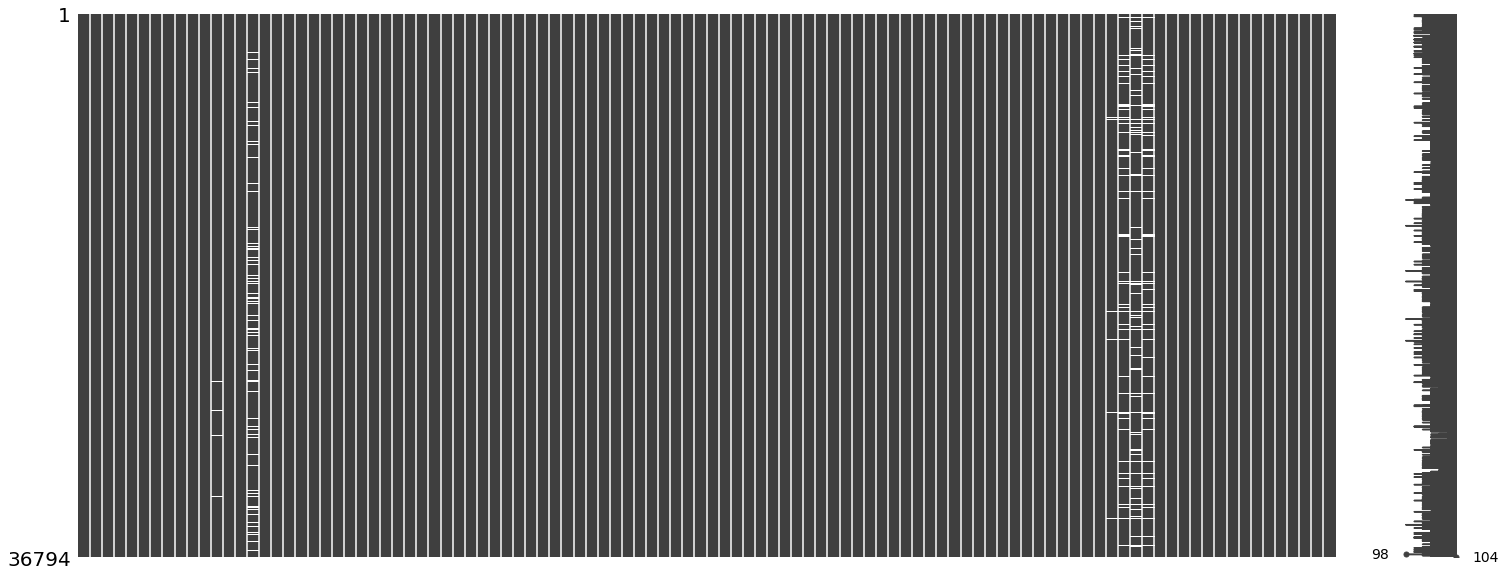

In [273]:
df = NullFunc(df)
df = ChangeType(df)

df1 = df.copy()
df1 = cal_accidents(df1)
df1 = cal_options(df1)

df2 = df1.copy()
df2, lb_1, ub_1, lb_2, ub_2, ub_3 ,lb_4, ub_4, lb_5, ub_5, ub_6 = remove_outliers(df2)

df3 = df2.copy()
df3 = car_name_split(df3)

df4 = df3.copy()
df4,df_ship_price_mean, df_nc_price_mean, df_new_price_mean = set_price_mean(df4)
df4 = set_car_price(df4)
df4 = car_year_name(df4)
df4, df_SUCCPRIC_mean_by_NMFUEL, df_SUCCPRIC_std_by_NMFUEL, df_SUCCPRIC_mean_by_NMYEAR, df_SUCCPRIC_std_by_NMYEAR = set_SUCCPRIC_mean(df4)

In [391]:
def cal_days(start, end): #날짜 차이 일(days) 계산용
    return (start-end).days

def make_day(df_):
    df_['DAY'] = df_.apply(lambda x : cal_days(x['SUCCYMD'],x['CARREGIYMD']),axis=1)
    return df_

In [393]:
def remove_column(df):
   return df.loc[:,['DAY',
                 'MISSNM','COLOR','EXHA','TRAVDIST','USEUSENM','OWNECLASNM',
                 'INNEEXPOCLASCD_YN','SUCCPRIC','YEARCHK',
                 'ACCI1','ACCI2','ACCI3','ACCI4','TRASHCAR',
                 'SAFETYOP','DRIVEOP','COMFORTOP',
                 'Car_price','SUCCPRIC_by_Car_NMFUEL_mean',
                 'SUCCPRIC_by_Car_NMFUEL_std','SUCCPRIC_by_Car_NMYEAR_mean','SUCCPRIC_by_Car_NMYEAR_std']]

In [395]:
#사용 변수만 추출
df5 = df4.copy()
df5 = make_day(df5)
df5 = remove_column(df5)

#결측행 제거
print(df5.shape)
originNum = df5.shape[0]
df5.dropna(inplace=True)
print('제거된 결측행 수 =', originNum -df5.shape[0])
print(df5.shape)
df5.isnull().sum()

(35201, 23)
제거된 결측행 수 = 320
(34881, 23)


DAY                            0
MISSNM                         0
COLOR                          0
EXHA                           0
TRAVDIST                       0
USEUSENM                       0
OWNECLASNM                     0
INNEEXPOCLASCD_YN              0
SUCCPRIC                       0
YEARCHK                        0
ACCI1                          0
ACCI2                          0
ACCI3                          0
ACCI4                          0
TRASHCAR                       0
SAFETYOP                       0
DRIVEOP                        0
COMFORTOP                      0
Car_price                      0
SUCCPRIC_by_Car_NMFUEL_mean    0
SUCCPRIC_by_Car_NMFUEL_std     0
SUCCPRIC_by_Car_NMYEAR_mean    0
SUCCPRIC_by_Car_NMYEAR_std     0
dtype: int64

In [396]:
#범주형 원 핫 인코딩
CATEGORICAL = ['MISSNM', 'COLOR', 'USEUSENM','OWNECLASNM','YEARCHK','INNEEXPOCLASCD_YN']

def onehotFunc(df_):
    for i in CATEGORICAL :
      cate_i = pd.get_dummies(df_.loc[:, i])
      df_[cate_i.columns] = cate_i
      df_.drop([i],axis=1,inplace=True)
    return(df_)

onehotFunc(df5)
df5.dtypes

DAY                            float64
EXHA                           float64
TRAVDIST                         int64
SUCCPRIC                         int64
ACCI1                            int64
ACCI2                            int64
ACCI3                            int64
ACCI4                            int64
TRASHCAR                         int64
SAFETYOP                         int64
DRIVEOP                          int64
COMFORTOP                        int64
Car_price                      float64
SUCCPRIC_by_Car_NMFUEL_mean    float64
SUCCPRIC_by_Car_NMFUEL_std     float64
SUCCPRIC_by_Car_NMYEAR_mean    float64
SUCCPRIC_by_Car_NMYEAR_std     float64
A/T                              uint8
CVT                              uint8
M/T                              uint8
A                                uint8
B                                uint8
C                                uint8
D                                uint8
F                                uint8
렌트                       

In [397]:
#y_price 분리
y_price = df5.loc[:, 'SUCCPRIC']
df_ = df5.drop('SUCCPRIC', 1)

In [398]:
numerical_col = ['DAY','EXHA','TRAVDIST','ACCI1','ACCI2','ACCI3','ACCI4','TRASHCAR','SAFETYOP','DRIVEOP','COMFORTOP',
                 'Car_price',
                 'SUCCPRIC_by_Car_NMFUEL_mean','SUCCPRIC_by_Car_NMFUEL_std', 'SUCCPRIC_by_Car_NMYEAR_mean', 'SUCCPRIC_by_Car_NMYEAR_std']
numerical_col_wY = ['DAY','EXHA','TRAVDIST','ACCI1','ACCI2','ACCI3','ACCI4','TRASHCAR','SAFETYOP','DRIVEOP','COMFORTOP',
                 'Car_price',
                 'SUCCPRIC_by_Car_NMFUEL_mean','SUCCPRIC_by_Car_NMFUEL_std', 'SUCCPRIC_by_Car_NMYEAR_mean', 'SUCCPRIC_by_Car_NMYEAR_std','SUCCPRIC']

In [399]:
def splitData(df, ratio, y_column):
    
    columns_ = df.columns
    # Subsample the data
    mask = list(range(0,df.shape[0], ratio))
    X_val = df.iloc[mask, :].drop(y_column, 1)
    y_val = df.iloc[mask][y_column]
    
    mask = ~df.index.isin(mask)
    X_train = df.loc[mask, :].drop(y_column, 1)
    y_train = df.loc[mask, y_column]
    
    return X_train, y_train, X_val, y_val

In [400]:
X_train, y_train, X_val, y_val = splitData(df5, 3, y_column = 'SUCCPRIC') 

In [401]:
# 수치형 데이터 정규화 함수
def z_normalize(df_, columns):
    if sum(df_.loc[:,columns].std()==0) !=0:
        print(":하나의 값만 존재하는 컬럼이 있음")
        return
    cache = {}
    cache['mean'] = df_.loc[:,columns].mean(axis=0)
    cache['std'] = df_.loc[:,columns].std(axis=0)
    
    return (df_.loc[:,columns] - df_.loc[:,columns].mean(axis=0))/(df_.loc[:,columns].std(axis=0)), cache 

def z_normalize_val(df, columns , cache):
      return(df.loc[:,columns]-cache['mean'])/cache['std']

In [402]:
X_train_norm = X_train.copy()
X_train_norm.loc[:, numerical_col], cache = z_normalize(X_train, numerical_col)
X_val_norm = X_val.copy()
X_val_norm.loc[:, numerical_col] = z_normalize_val(X_val, numerical_col, cache)

In [403]:
from sklearn.ensemble import RandomForestRegressor

#################################################################################
# TODO: validation dataset을 활용하여 하이퍼 파라미터를 조정하고 가장 좋은 모델 # 
# 을 저장하여 test dataset에 사용                                               #
#                                                                               
# 1. n_estimators, max_depth을 조절하여 가장 좋은 모델을 'best_rf'에 저장, 가장 
# 좋은 모델의 하이퍼 파라미터를 'best_hyperparamter'에 저장. 모델의 성능 비교는
# validation set의 MSE를 참조하고 가장 좋은 모델의 MSE를 'best_MSE'에 저장.
#
# 2. 현재 가장 좋은 모델의 하이퍼파라미터를 고정하고 Random Forest 모델의 다른 
# hyperparameter를 조절하여 성능 차이 비교 (위의 scikit-learn 문서 참조)
#################################################################################
def runRandomForest(x_train,y_train,x_val,y_val):

    best_rf = None # store the best model into this 
    best_mse = 1e15
    best_hyperparameter = None
    results = {}
    n_estimators = [50, 100]
    max_depths = [100, 200]
    best_parameter = []

    ects = None

    for i in n_estimators:
        for j in max_depths:
            regr = RandomForestRegressor(n_estimators=i, criterion='mse', max_depth=j)
            regr.fit(x_train,y_train)
            predicted = regr.predict(x_val)
            mse = np.mean(np.square(predicted-y_val))
            print('n_estimator : ',i,' max_depth : ',j)
            print('VALID 중고차 낙찰가 MSE: ',mse)
            print('VALID 중고차 낙찰가 MAE: ',np.mean(np.abs(predicted-y_val)))
  
            print('*'*50)
            
            if (mse < best_mse):
                best_mse = mse
                best_rf = regr
                best_parameter = ['n_estimator :'+str(i),'max_depth :'+str(j)]
          
    return best_mse, best_rf,best_parameter 

In [404]:
best_mse,best_rf,best_parameter = runRandomForest(X_train_norm,y_train,X_val_norm,y_val)

n_estimator :  50  max_depth :  100
VALID 중고차 낙찰가 MSE:  254744934273.67334
VALID 중고차 낙찰가 MAE:  308427.59095209424
**************************************************
n_estimator :  50  max_depth :  200
VALID 중고차 낙찰가 MSE:  254063564052.6361
VALID 중고차 낙찰가 MAE:  308230.10234798316
**************************************************
n_estimator :  100  max_depth :  100
VALID 중고차 낙찰가 MSE:  248761084929.04446
VALID 중고차 낙찰가 MAE:  304359.63705169
**************************************************
n_estimator :  100  max_depth :  200
VALID 중고차 낙찰가 MSE:  247429782385.82608
VALID 중고차 낙찰가 MAE:  304332.57074051775
**************************************************


In [405]:
X_train_norm.dtypes

DAY                            float64
EXHA                           float64
TRAVDIST                       float64
ACCI1                          float64
ACCI2                          float64
ACCI3                          float64
ACCI4                          float64
TRASHCAR                       float64
SAFETYOP                       float64
DRIVEOP                        float64
COMFORTOP                      float64
Car_price                      float64
SUCCPRIC_by_Car_NMFUEL_mean    float64
SUCCPRIC_by_Car_NMFUEL_std     float64
SUCCPRIC_by_Car_NMYEAR_mean    float64
SUCCPRIC_by_Car_NMYEAR_std     float64
A/T                              uint8
CVT                              uint8
M/T                              uint8
A                                uint8
B                                uint8
C                                uint8
D                                uint8
F                                uint8
렌트                               uint8
리스                       

In [406]:
predicted = best_rf.predict(X_val_norm) ######## 수정 12:35

print('중고차 낙찰가 MSE: ',np.mean(np.square(predicted-y_val)))
print('중고차 낙찰가 MAE: ',np.mean(np.abs(predicted-y_val)))
print('Best parameters : [', best_parameter[0], ', ',best_parameter[1],']' )

중고차 낙찰가 MSE:  247429782385.82608
중고차 낙찰가 MAE:  304332.57074051775
Best parameters : [ n_estimator :100 ,  max_depth :200 ]


D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53944 missing 

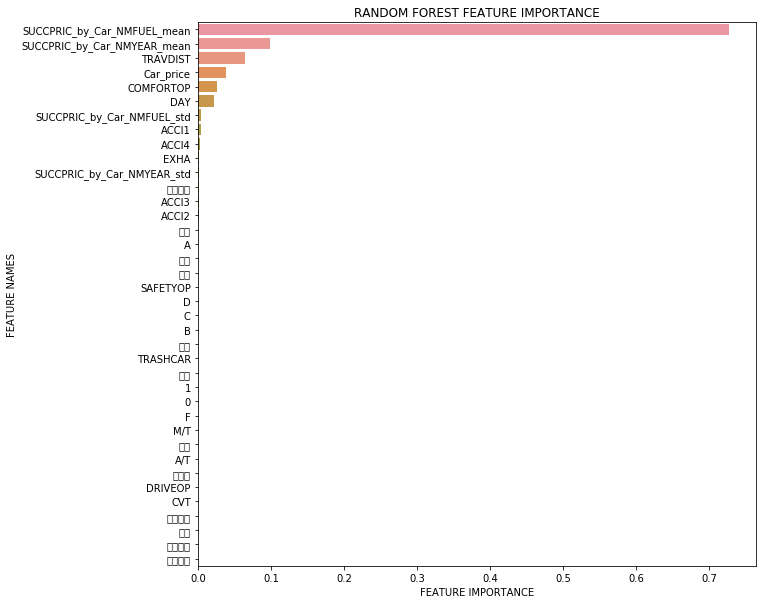

In [407]:
def plot_feature_importance(importance_, features_,model_type):
      dict_ = {'feature importance' : importance_, 'features' : features_}
      df = pd.DataFrame(dict_)
      df.sort_values(by=['feature importance'], ascending=False,inplace=True)
      plt.figure(figsize=(10,10))
      sns.barplot(x=df['feature importance'], y=df['features'])
      plt.title(model_type + 'FEATURE IMPORTANCE')
      plt.xlabel('FEATURE IMPORTANCE')
      plt.ylabel('FEATURE NAMES')

      
plot_feature_importance(best_rf.feature_importances_, X_val.columns, 'RANDOM FOREST ')

In [408]:
best_rf.feature_importances_

array([2.23803264e-02, 1.57975183e-03, 6.44652953e-02, 3.71985830e-03,
       9.27006470e-04, 9.75660129e-04, 2.61018141e-03, 1.95816011e-04,
       4.43489521e-04, 1.02436892e-05, 2.61132375e-02, 3.82128098e-02,
       7.27698607e-01, 3.75847429e-03, 9.91942666e-02, 1.57224189e-03,
       9.32043042e-05, 7.17301289e-06, 1.02766086e-04, 6.46585143e-04,
       3.10258510e-04, 3.42029581e-04, 3.88513267e-04, 1.25500286e-04,
       7.58763080e-04, 2.40476011e-04, 9.73419279e-07, 1.00460436e-04,
       5.59519713e-04, 1.80601285e-04, 0.00000000e+00, 5.63620811e-04,
       1.40227653e-03, 2.07176285e-05, 2.89471624e-06, 2.28270752e-07,
       1.47836849e-04, 1.48334812e-04])

column CARREGIYMD have 1 null value 

column FUELNM have 1 null value 

column EXHA have 3 null value 

column USEUSENM have 323 null value 

column OWNECLASNM have 13 null value 

column NEWCARPRIC have 36794 null value 

column DT_MODEL_KEY have 3 null value 

column MJ_GRADE_KEY have 33 null value 

column DT_GRADE_KEY have 584 null value 

column NC_GRADE_KEY have 3601 null value 

column SHIPPING_PRICE have 4460 null value 

column NC_GRADE_PRICE have 3781 null value 



D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A 

AxesSubplot(0.125,0.125;0.698618x0.755)
GOODNO                                  0
SUCCYMD                                 0
CARNM                                   0
CHASNO                                  0
CARREGIYMD                              1
YEAR                                    0
MISSNM                                  0
FUELNM                                  1
COLOR                                   0
EXHA                                    3
TRAVDIST                                0
USEUSENM                              323
OWNECLASNM                             13
INNEEXPOCLASCD_YN                       0
NEWCARPRIC                          36794
SUCCPRIC                                0
YEARCHK                                 0
BONET                                   0
FRONT_LEFT_FENDER                       0
FRONT_RIGHT_FENDER                      0
FRONT_LEFT_DOOR                         0
FRONT_RIGHT_DOOR                        0
BACK_LEFT_DOOR                      

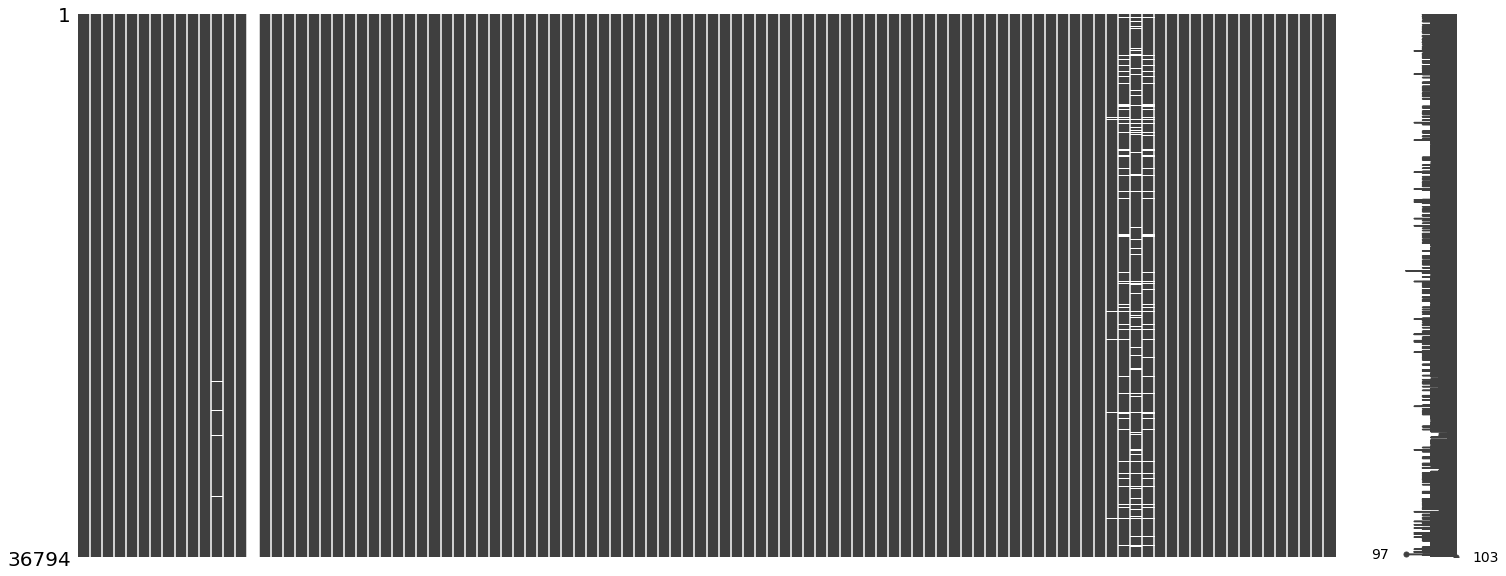

In [357]:
df_test = pd.read_csv('Kia_testset_sample.csv', encoding='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'
df_test = NullFunc(df_test)
df_test = ChangeType(df_test)

df_test = cal_accidents(df_test)
df_test = cal_options(df_test)
df_test = car_name_split(df_test)


df_test,df_ship_price_mean, df_nc_price_mean, df_new_price_mean = set_price_mean(df_test)
df_test = set_car_price(df_test)
df_test = car_year_name(df_test)
df_test, df_SUCCPRIC_mean_by_NMFUEL, df_SUCCPRIC_std_by_NMFUEL, df_SUCCPRIC_mean_by_NMYEAR, df_SUCCPRIC_std_by_NMYEAR = set_SUCCPRIC_mean(df_test)

In [358]:
def make_cat(df,CATEGORICAL):
    df_ = df.loc[:,['DAY','EXHA','TRAVDIST','ACCI1','ACCI2','ACCI3','ACCI4',
                    'TRASHCAR','SAFETYOP','DRIVEOP','COMFORTOP','Car_price',
                    'SUCCPRIC_by_Car_NMFUEL_mean','SUCCPRIC_by_Car_NMFUEL_std', 
                    'SUCCPRIC_by_Car_NMYEAR_mean', 'SUCCPRIC_by_Car_NMYEAR_std','SUCCPRIC']]
    for i in CATEGORICAL :
        cate_i = pd.get_dummies(df.loc[:, i])
        df_[cate_i.columns] = cate_i
        
    df_.dropna(inplace=True)
    #print(df_.isnull().sum())
    return df_

In [359]:
#사용 변수만 추출
df_test = make_day(df_test)
df_test = remove_column(df_test)

df_test = make_cat(df_test,CATEGORICAL)    
df5.dtypes

DAY                            float64
EXHA                           float64
TRAVDIST                         int64
SUCCPRIC                         int64
ACCI1                            int64
ACCI2                            int64
ACCI3                            int64
ACCI4                            int64
TRASHCAR                         int64
SAFETYOP                         int64
DRIVEOP                          int64
COMFORTOP                        int64
Car_price                      float64
SUCCPRIC_by_Car_NMFUEL_mean    float64
SUCCPRIC_by_Car_NMFUEL_std     float64
SUCCPRIC_by_Car_NMYEAR_mean    float64
SUCCPRIC_by_Car_NMYEAR_std     float64
A/T                              uint8
CVT                              uint8
M/T                              uint8
A                                uint8
B                                uint8
C                                uint8
D                                uint8
F                                uint8
렌트                       

In [360]:
y_test = df_test.loc[:, 'SUCCPRIC']
X_test = df_test.drop('SUCCPRIC', 1)
X_test.dtypes

DAY                              int64
EXHA                             int64
TRAVDIST                         int64
ACCI1                            int64
ACCI2                            int64
ACCI3                            int64
ACCI4                            int64
TRASHCAR                         int64
SAFETYOP                         int64
DRIVEOP                          int64
COMFORTOP                        int64
Car_price                      float64
SUCCPRIC_by_Car_NMFUEL_mean    float64
SUCCPRIC_by_Car_NMFUEL_std     float64
SUCCPRIC_by_Car_NMYEAR_mean    float64
SUCCPRIC_by_Car_NMYEAR_std     float64
A/T                              uint8
A                                uint8
B                                uint8
C                                uint8
D                                uint8
렌트                               uint8
리스                               uint8
업무                               uint8
자가                               uint8
법인상품                     

In [362]:
#y_price 분리
y_test = df_test.loc[:, 'SUCCPRIC']
X_test = df_test.drop('SUCCPRIC', 1)

X_test_norm = X_test.copy()
X_test_norm.loc[:, numerical_col]  = z_normalize_val(X_test, numerical_col, cache)

predicted = best_rf.predict(X_test_norm) ######## 수정 12:35

print('중고차 낙찰가 MSE: ',np.mean(np.square(predicted-y_test)))
print('중고차 낙찰가 MAE: ',np.mean(np.abs(predicted-y_test)))
print('Best parameters : [', best_parameter[0], ', ',best_parameter[1],']' )
      
plot_feature_importance(best_rf.feature_importances_, X_test.columns, 'RANDOM FOREST ')

ValueError: Number of features of the model must match the input. Model n_features is 38 and input n_features is 28 